# Unsupervised Learning dimensionality reduction example

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. Each image is 28x28 pixels, thus, each observation has 784 dimensions.

## Import Data

In [17]:
from sklearn.datasets import fetch_mldata
from sklearn import datasets
mnist = fetch_mldata('MNIST original')
digits = datasets.load_digits(n_class=10)

In [2]:
print(mnist.DESCR)

mldata.org dataset: mnist-original


In [3]:
X = mnist.data.astype('float64')
y = mnist.target

## Split Data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X, y = mnist.data / 255., mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Dimensionality reduction

In [20]:
from time import time

import numpy as np
from sklearn import manifold
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib import offsetbox

In [40]:
# Scale and visualize the embedding vectors
def plot_embedding(X,y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

indexes=np.random.choice(len(X_train),size=300)

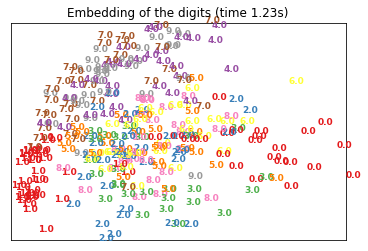

In [51]:
# train embedding model
embedding_PCA = PCA(n_components=2)
t0 = time()
X_embedding = embedding_PCA.fit_transform(X_train)


plot_embedding(X_embedding[indexes],y_train[indexes],
               "Embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [44]:
# train embedding model (be careful the TSNE embedding may take up to 1 hour 30 minutes to fit)
embedding = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_embedding = embedding.fit_transform(X_train)

plot_embedding(X_embedding[indexes],y_train[indexes],
               "Embedding of the digits (time %.2fs)" %
               (time() - t0))

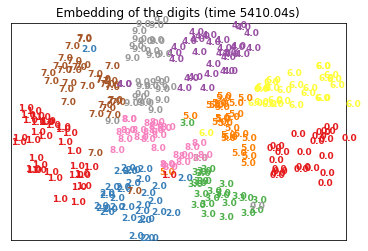

In [45]:
plt.show()

## Exercise

1. What can we infer from this embedding visualization?
2. Which other dimensionality reduction algorithms can we use here? try Linear Discriminant projection.
3. Why would it help us to reduce the number of dimensions before training and testing a classification model?
4. Take an example classifier (DecisionTreeClassifier) and try to train and test it using the result of the Linear Discriminant projection. Change the number of components and see what happens.